In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-05-10 05:54:07,314 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-10 05:54:07,317 - settings - Setting database.user to celiib
INFO - 2021-05-10 05:54:07,318 - settings - Setting database.password to newceliipass
INFO - 2021-05-10 05:54:07,322 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-05-10 05:54:07,324 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-10 05:54:07,339 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-05-10 05:54:07,757 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-10 05:54:07,761 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-10 05:54:07,762 - settings - Setting database.user to celiib
INFO - 2021-05-10 05:54:07,763 - settings - Setting database.password to newceliipass
INFO - 2021-05-10 05:54:07,763 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-10 05:54:07,764 - settings - Setting database.user to celiib
INFO - 2021-05-10 05:54:07,765 - settings - Setting database.password to newceliipass
INFO - 2021-05-10 05:54:07,768 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-10 05:54:08,220 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-05-10 05:54:16,845 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-10 05:54:16,846 - settings - Setting database.user to celiib
INFO - 2021-05-10 05:54:16,847 - settings - Setting database.password to newceliipass
INFO - 2021-05-10 05:54:16,851 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-10 05:54:17,330 - settings - Setting enable_python_native_blobs to True


In [4]:
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su
import axon_utils as au
import trimesh_utils as tu

# Getting the limb branch dict

In [17]:
curr_table = ((minnie.DecompositionAxon() & "axon_length>500"))
curr_table

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,axon_length length (in um) of the classified axon skeleton,run_time the amount of time to run (seconds)
864691134876192250,0,0.25,30.00,0,0,0,4,=BLOB=,1023.0940357102944,209.28
864691134884741114,0,0.25,30.00,0,0,0,4,=BLOB=,2977.706081286783,517.09
864691134884741370,0,0.25,30.00,0,0,0,4,=BLOB=,558.9660414537605,209.07
864691134884741626,0,0.25,30.00,0,0,0,4,=BLOB=,576.8243192402768,580.43
864691134884742138,0,0.25,30.00,0,0,0,4,=BLOB=,739.06078934354,231.95
864691134884742394,0,0.25,30.00,0,0,0,4,=BLOB=,1900.071761948801,311.45
864691134884742650,0,0.25,30.00,0,0,0,4,=BLOB=,2701.510739187321,2318.26
864691134884743418,0,0.25,30.00,0,0,0,4,=BLOB=,1137.019678449479,171.58
864691134884743930,0,0.25,30.00,0,0,0,4,=BLOB=,1823.9167193276587,387.44
864691134884744186,0,0.25,30.00,0,0,0,4,=BLOB=,2717.917048692441,3635.89


In [21]:
search_key = dict(segment_id=864691134884745722)
neuron_obj_path = (curr_table & search_key).fetch1("decomposition")
key = (curr_table & search_key).proj().fetch1()
key

{'segment_id': 864691134884745722,
 'decimation_version': 0,
 'decimation_ratio': Decimal('0.25'),
 'ver': Decimal('30.00'),
 'process_version': 0,
 'index': 0,
 'split_index': 0,
 'axon_version': 4}

In [9]:
neuron_objs,split_idxs = du.decomposition_with_spine_recalculation(864691134884745722)

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1


In [10]:
nviz.visualize_neuron_lite(neuron_objs[0])


 Working on visualization type: mesh


In [12]:
neuron_obj = neuron_objs[0]

In [13]:
nviz.plot_axon(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [ ]:
skeletal_angle_offset
axon_sk_direction_comparison_distance
buffer_for_skeleton
top_volume_vector = np.array([0,-1,0]),

In [33]:
from copy import deepcopy
n_copy = deepcopy(neuron_obj)

In [35]:
axon_angles

{1: {0: 132.8566907140693}}

In [41]:
axon_limb_branch_dict,axon_angles = clu.axon_classification(n_copy,
                                                                    return_error_labels=False,
                                                                    verbose=False,
                                                                    plot_axons=False,
                                                                        best_axon=True,
                                                                    label_axon_errors=True,
                                                                    return_axon_angles=True)

endnodes_to_test = []
endnodes_to_test = [2742]
Skeleton paths distances = [24958.78511284]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [132.85669071]
base_final_widths = [162.3686667  165.72382766 162.64602076]
overall_ais_width = 160.04645862889691
ais_width = 163.57950504091886


In [42]:
axon_angles

{1: {0: 132.8566907140693}}

endnodes_to_test = [2742]
Skeleton paths distances = [24958.78511284]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [132.85669071]
local_axon_angles = [132.85669071]


{1: {0: 132.8566907140693}}

In [ ]:
# def candidate_starting_skeletal_angle(limb_obj,candidate_nodes,
#                                       offset = 10000,#20000,
#                                     axon_sk_direction_comparison_distance = 10000,#5000,
#                                     buffer_for_skeleton = 5000,
#                                       top_volume_vector = np.array([0,-1,0]),
#                                       plot_skeleton_paths_before_restriction=False,
#                                       plot_skeleton_paths_after_restriction=False,
#                                       return_restricted_skeletons=False,
#                                       branches_not_to_consider_for_end_nodes = None,
#                                       verbose=False,
#                                      )

# filter_axon_candiates(neuron_obj,
#     axon_subgraph_candidates,
#     axon_angle_threshold_relaxed = 110,#90,
#     axon_angle_threshold = 120,
#     relaxation_percentage = 0.85,
                          
#     #parameters for computing the skeletal angle
     
#     skeletal_angle_offset = 10000,
#     skeletal_angle_comparison_distance = 10000,
#     skeletal_angle_buffer = 5000,
                          
#     axon_like_limb_branch_dict = None,
                          
#                           min_ais_width=85,#85,
#                           use_beginning_ais_for_width_filter=True,
                          
#     extra_ais_checks= False, #feature that is not needed with new flip_dendrite_to_axon added at axon-like identification step
                          
#     verbose = False,
    
                          
#     return_axon_angles = True,
#     best_axon=False,
#     best_axon_skeletal_legnth_ratio = 20,
#     **kwargs
#     ):

In [ ]:
candidate_angles,restr_skels = clu.candidate_starting_skeletal_angle(limb_obj=curr_limb,
                              candidate_nodes=candidate_nodes,
                                  offset = skeletal_angle_offset,
                                axon_sk_direction_comparison_distance = skeletal_angle_comparison_distance,
                                buffer_for_skeleton = skeletal_angle_buffer,
                                  top_volume_vector = np.array([0,-1,0]),
                                  plot_skeleton_paths_before_restriction=False,
                                  plot_skeleton_paths_after_restriction=False,
                                                 return_restricted_skeletons=True,
                                  verbose=verbose,
                                   branches_not_to_consider_for_end_nodes = non_axon_branches_on_subgraph,
                                **kwargs
                                 )

In [27]:
neuron_obj_copy 

{'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25])}

In [51]:
import proofreading_utils as pru
proof_version = 4
curr_output = pru.proofreading_table_processing(key,
                                  proof_version=proof_version,
                                  compute_synapse_to_soma_skeletal_distance=True,
                                perform_axon_classification = False,
                                high_fidelity_axon_on_excitatory=False,
                                 verbose=True,) 



------- AutoProofreadNeuron 864691134884745722  ----------
**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1
Number of Neurons found =1
Number of Corresponding Nuclei = 1
nucleus_ids = [268126]
nucleus_centers = [[672448 876736 602960]]

-----Working on Neuron Split 0-----

   --> Part A: Proofreading the Neuron ----
---- Part A: NOT Attempting to split neuron --------

--- Working on Neuron 0 ---


 ------ Part B: Axon Classification ---- 


Skipping Axon Classification
endnodes_to_test = [2742]
Skeleton paths distances = [24958.78511284]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [132.85669071]
local_axon_angles = [132.85669071]


 ------ Part C: Inhibitory Excitatory Classification ---- 


spine_category = densely_spined
Inhibitory Excitatory Classification = 2.102520704269409

 -- Cell Type Classification Results --
inh_exc_class=exci

two_downstream_thick_axon_limb_branch = {'L1': array([3, 4, 5, 8])}
With divergence_threshold_mean = 165
fork_div_limb_branch = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict was empty so returning original neuron
----------------------- FINISHED Running Filter ------------------



 --Filter axon_fork_divergence Results --
local_results = {'axon_fork_divergence_neuron': <neuron.Neuron object at 0x7f1e267a2b00>, 'axon_fork_divergence_time': 0.3322114944458008, 'axon_fork_divergence_error_area': 0, 'axon_fork_divergence_error_length': 0, 'axon_fork_divergence_limb_branch_dict_to_cancel': {}}



 ---- Total time for applying filter: 16.25119137763977 -----


 ------ Part E: Save Neuron  ---- 

 


Total time for Neuron Proofreading: 19.481199264526367


    --> Part B: Getting Soma Centers and Matching To Nuclei ----
soma_center = [673698 876858 602088]
nuclei_within_radius = [268126]
nuclei_within_radius_distance = [1528.976128]

There were 1 nuclei found within the radius of 15000

# How to save of the limb_branch dicts

In [53]:
curr_output.keys()

dict_keys(['AutoProofreadSynapse_keys', 'AutoProofreadNeurons_keys', 'filtering_info_list', 'synapse_stats_list', 'total_error_synapse_ids_list', 'neuron_mesh_list', 'axon_mesh_list', 'neuron_split_idxs', 'axon_skeleton_list', 'dendrite_skeleton_list'])

In [58]:
curr_filter_info = curr_output["filtering_info_list"][0]
pru.extract_limb_branch_dict_to_cancel_from_filter_info(curr_filter_info)

{'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {'L0': array([6])},
 'high_degree_branching_limb_branch_dict_to_cancel': {'L1': array([3, 5])},
 'axon_webbing_t_merges_limb_branch_dict_to_cancel': {},
 'thick_t_merge_limb_branch_dict_to_cancel': {},
 'double_back_and_width_change_limb_branch_dict_to_cancel': {},
 'axon_fork_divergence_limb_branch_dict_to_cancel': {}}

In [59]:
curr_filter_info

{'axon_on_dendrite_merges_neuron': <neuron.Neuron at 0x7f1e2589f780>,
 'axon_on_dendrite_merges_time': 3.743853807449341,
 'axon_on_dendrite_merges_error_area': 12.189345339696821,
 'axon_on_dendrite_merges_error_length': 13.264956663596713,
 'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {'L0': array([6])},
 'high_degree_branching_neuron': <neuron.Neuron at 0x7f1e25b47400>,
 'high_degree_branching_time': 6.5190629959106445,
 'high_degree_branching_error_area': 98.36856635221723,
 'high_degree_branching_error_length': 130.7500793188991,
 'high_degree_branching_limb_branch_dict_to_cancel': {'L1': array([3, 5])},
 'axon_webbing_t_merges_neuron': <neuron.Neuron at 0x7f1e24e48cf8>,
 'axon_webbing_t_merges_time': 0.36612367630004883,
 'axon_webbing_t_merges_error_area': 0,
 'axon_webbing_t_merges_error_length': 0,
 'axon_webbing_t_merges_limb_branch_dict_to_cancel': {},
 'thick_t_merge_neuron': <neuron.Neuron at 0x7f1e24aa7d30>,
 'thick_t_merge_time': 0.5303072929382324,
 'thick_t_me

In [64]:
minnie,_ = du.configure_minnie_vm()
limb_branch_to_cancel = minnie.AutoProofreadStats4.fetch("limb_branch_to_cancel")
limb_branch_to_cancel

array([{'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {'L0': array([6])}, 'high_degree_branching_limb_branch_dict_to_cancel': {'L1': array([3, 5])}, 'axon_webbing_t_merges_limb_branch_dict_to_cancel': {}, 'thick_t_merge_limb_branch_dict_to_cancel': {}, 'double_back_and_width_change_limb_branch_dict_to_cancel': {}, 'axon_fork_divergence_limb_branch_dict_to_cancel': {}},
       {'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {'L0': array([16]), 'L1': array([29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46]), 'L2': array([5])}, 'high_degree_branching_limb_branch_dict_to_cancel': {'L1': array([ 6,  2, 13, 16, 18,  4])}, 'axon_webbing_t_merges_limb_branch_dict_to_cancel': {}, 'thick_t_merge_limb_branch_dict_to_cancel': {}, 'double_back_and_width_change_limb_branch_dict_to_cancel': {'L1': [4, 5, 6, 0, 1]}, 'axon_fork_divergence_limb_branch_dict_to_cancel': {}}],
      dtype=object)

# Converting the limb branch dict into a neuroglancer link

In [65]:
minnie.AutoProofreadStats4()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),axon_faces faces indices that were saved off as belonging to proofread neuron's axon (external storage),axon_skeleton the skeleton of the axon of the final proofread neuorn,dendrite_skeleton the skeleton of the dendrite branches of the final proofread neuorn,axon_on_dendrite_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_on_dendrite_merges_error_length the length (in um) of skeleton distance canceled out by filter,low_branch_clusters_error_area the area (in um ^ 2) of the faces canceled out by filter,low_branch_clusters_error_length the length (in um) of skeleton distance canceled out by filter,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,double_back_and_width_change_error_area the area (in um ^ 2) of the faces canceled out by filter,double_back_and_width_change_error_length the length (in um) of skeleton distance canceled out by filter,crossovers_error_area the area (in um ^ 2) of the faces canceled out by filter,crossovers_error_length the length (in um) of skeleton distance canceled out by filter,high_degree_coordinates_error_area the area (in um ^ 2) of the faces canceled out by filter,high_degree_coordinates_error_length the length (in um) of skeleton distance canceled out by filter,high_degree_branching_error_area the area (in um ^ 2) of the faces canceled out by filter,high_degree_branching_error_length the length (in um) of skeleton distance canceled out by filter,axon_webbing_t_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_webbing_t_merges_error_length the length (in um) of skeleton distance canceled out by filter,thick_t_merge_error_area the area (in um ^ 2) of the faces canceled out by filter,thick_t_merge_error_length the length (in um) of skeleton distance canceled out by filter,axon_fork_divergence_error_area the area (in um ^ 2) of the faces canceled out by filter,axon_fork_divergence_error_length the length (in um) of skeleton distance canceled out by filter,n_valid_syn_presyn_for_split,n_valid_syn_postsyn_for_split,n_presyn_error_syn_non_axon,n_presyn_error_syn,n_postsyn_error_syn,total_error_synapses,total_presyns,total_postsyns,total_synapses,perc_error_presyn,perc_error_postsyn,overall_percent_error,limb_branch_to_cancel stores the limb information from
864691134884745722,0,0.25,30.00,0,0,0,4,=BLOB=,=BLOB=,=BLOB=,=BLOB=,12.19,13.26,nan,nan,nan,nan,0.0,0.0,nan,nan,nan,nan,98.37,130.75,0.0,0.0,0.0,0.0,0.0,0.0,13,20,1,11,0,11,24,20,44,0.4583,0.0,0.25,=BLOB=
864691135643516227,0,0.25,30.00,0,0,0,4,=BLOB=,=BLOB=,=BLOB=,=BLOB=,415.98,361.94,nan,nan,nan,nan,53.59,41.81,nan,nan,nan,nan,201.84,184.29,0.0,0.0,0.0,0.0,0.0,0.0,2,127,4,57,1,58,59,128,187,0.9661,0.0078,0.3102,=BLOB=


In [72]:
du.plot_proofread_neuron(864691135643516227,
                         plot_errored_faces=True,
                        plot_error_synapses=True,
                        plot_proofreading_synapses = True,
                        plot_axon=False,
                        plot_axon_skeleton=False)

Synapsse Results:
Total Number of Synapses = 187
n_valid_syn_ids_presyn = 2
n_errored_syn_ids_presyn = 57
n_valid_syn_ids_postsyn = 127
n_errored_syn_ids_postsyn = 1


# Getting the red-blue splits

In [73]:
limb_branch_keys = minnie.AutoProofreadStats4.proj("limb_branch_to_cancel").fetch(as_dict=True)
limb_branch_keys

[{'segment_id': 864691134884745722,
  'decimation_version': 0,
  'decimation_ratio': Decimal('0.25'),
  'ver': Decimal('30.00'),
  'process_version': 0,
  'index': 0,
  'split_index': 0,
  'proof_version': 4,
  'limb_branch_to_cancel': {'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {'L0': array([6])},
   'high_degree_branching_limb_branch_dict_to_cancel': {'L1': array([3, 5])},
   'axon_webbing_t_merges_limb_branch_dict_to_cancel': {},
   'thick_t_merge_limb_branch_dict_to_cancel': {},
   'double_back_and_width_change_limb_branch_dict_to_cancel': {},
   'axon_fork_divergence_limb_branch_dict_to_cancel': {}}},
 {'segment_id': 864691135617791887,
  'decimation_version': 0,
  'decimation_ratio': Decimal('0.25'),
  'ver': Decimal('30.00'),
  'process_version': 0,
  'index': 0,
  'split_index': 0,
  'proof_version': 4,
  'limb_branch_to_cancel': {'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {'L0': array([ 2,  4, 14]),
    'L1': array([6]),
    'L2': array([ 7,  8,  9, 12])}

In [81]:
key_idx = 1
curr_key = limb_branch_keys[key_idx]
print(f"Working on segment: {curr_key['segment_id']}")

Working on segment: 864691135617791887


In [82]:
curr_key

{'segment_id': 864691135617791887,
 'decimation_version': 0,
 'decimation_ratio': Decimal('0.25'),
 'ver': Decimal('30.00'),
 'process_version': 0,
 'index': 0,
 'split_index': 0,
 'proof_version': 4,
 'limb_branch_to_cancel': {'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {'L0': array([ 2,  4, 14]),
   'L1': array([6]),
   'L2': array([ 7,  8,  9, 12])},
  'high_degree_branching_limb_branch_dict_to_cancel': {},
  'axon_webbing_t_merges_limb_branch_dict_to_cancel': {},
  'thick_t_merge_limb_branch_dict_to_cancel': {},
  'double_back_and_width_change_limb_branch_dict_to_cancel': {},
  'axon_fork_divergence_limb_branch_dict_to_cancel': {}}}

In [83]:
segment_id = curr_key['segment_id']
split_index = curr_key['split_index']
neuron_obj = du.decomposition_with_spine_recalculation(segment_id,
                                                      split_index)
neuron_obj

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1


In [84]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [85]:
curr_key["limb_branch_to_cancel"]["axon_on_dendrite_merges_limb_branch_dict_to_cancel"]

{'L0': array([ 2,  4, 14]), 'L1': array([6]), 'L2': array([ 7,  8,  9, 12])}

In [92]:
curr_cancel_key = list(curr_key["limb_branch_to_cancel"].keys())[0]


'axon_on_dendrite_merges'

In [97]:
limb_obj = neuron_obj[0]
limb_obj

In [99]:
limb_obj.current_touching_soma_vertices

[autoreload of proofreading_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/meshAfterParty/proofreading_utils.py", line 5289
    branch_

TrackedArray([[1341664. ,  611325.5,  855054.2],
              [1342169. ,  615028.8,  855385.4],
              [1342042. ,  611321.4,  855255.6],
              [1341332. ,  610258.2,  855829. ],
              [1341207. ,  610428. ,  855834. ],
              [1343390. ,  614186.5,  855382.6],
              [1343520. ,  612803.3,  855294.1],
              [1342326. ,  612972.8,  855189.4],
              [1342814. ,  614586. ,  855256.5],
              [1341778. ,  610260.4,  855708.4],
              [1342231. ,  614932.5,  855246. ],
              [1340955. ,  610459.5,  855729. ],
              [1342087. ,  613243.6,  855105.8],
              [1343458. ,  612641.6,  855319.9],
              [1341848. ,  610344. ,  855571.5],
              [1342132. ,  611393.4,  855320.9],
              [1342089. ,  614470.5,  854815.5],
              [1343024. ,  612055.5,  855267. ],
              [1343360. ,  614229.6,  855275.9],
              [1342909. ,  612056.4,  855192.8],
              [13439

In [96]:
pru.extract_blue_red_points_from_limb_branch_dict_to_cancel(neuron_obj,
                                                           curr_key["limb_branch_to_cancel"])

{'axon_on_dendrite_merges': {'L0': {0: {'error_branches': array([2]),
    'valid_branches': array([3]),
    'valid_points': array([[1318608.33333333,  601808.6       ,  801872.8       ],
           [1318870.33333333,  602107.66666667,  799863.43333333]]),
    'error_points': array([[1318342.        ,  603322.86666667,  800585.36666667]])},
   1: {'error_branches': array([4]),
    'valid_branches': array([6]),
    'valid_points': array([[1377308.        ,  621879.9       ,  706579.83333333],
           [1378798.        ,  621229.7       ,  705761.86666667]]),
    'error_points': array([[1377969.33333333,  622894.23333333,  706322.93333333]])},
   2: {'error_branches': array([14]),
    'valid_branches': array([6]),
    'valid_points': array([[1377308.        ,  621879.9       ,  706579.83333333],
           [1377969.33333333,  622894.23333333,  706322.93333333]]),
    'error_points': array([[1378798.        ,  621229.7       ,  705761.86666667]])}},
  'L1': {0: {'error_branches': array([

# How to turn the extracted blue red suggestions into neuroglancer links

In [162]:
red_blue_keys = minnie.AutoProofreadStats4.proj("red_blue_suggestions").fetch(as_dict=True)

In [163]:
minnie.AutoProofreadNeurons4 & dict(cell_type_predicted = "excitatory")

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,axon_version key by which to lookup the finer axon processing method,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,n_boutons,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691136361533410,0,0.25,30.00,5,0,1,4,4,2,excitatory,sparsely_spined,

In [175]:
ret_df = alu.stats_table_to_auto_proof_red_blue_suggestions_df(
    minnie.AutoProofreadStats4(),
output_filepath="./test_auto.csv")
ret_df

# of Entries Processing = 2
Workin on 864691136361533410, split 0
error_type = low_branch_clusters
error_type = crossovers
error_type = double_back_and_width_change
error_type = high_degree_coordinates
Workin on 864691136361533410, split 1
error_type = axon_on_dendrite_merges
error_type = high_degree_branching
error_type = axon_webbing_t_merges
error_type = thick_t_merge
error_type = double_back_and_width_change
error_type = axon_fork_divergence


,segment_id,split_index,nucleus_id,spine_category,cell_type_predicted,error_type,limb_name,error_idx,neuroglancer_link,error_skeletal_length
0,864691136361533410,0,135757,sparsely_spined,inhibitory,crossovers,L0,0,https://neuromancer-seung-import.appspot.com/#...,593196.214308
1,864691136361533410,0,135757,sparsely_spined,inhibitory,crossovers,L0,1,https://neuromancer-seung-import.appspot.com/#...,94954.505907
2,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L0,0,https://neuromancer-seung-import.appspot.com/#...,19488.687014
3,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L0,1,https://neuromancer-seung-import.appspot.com/#...,76208.550243
4,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L0,2,https://neuromancer-seung-import.appspot.com/#...,89751.018891
5,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L0,3,https://neuromancer-seung-import.appspot.com/#...,59049.631269
6,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L0,4,https://neuromancer-seung-import.appspot.com/#...,40139.377979
7,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L0,5,https://neuromancer-seung-import.appspot.com/#...,11670.791863
8,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L0,6,https://neuromancer-seung-import.appspot.com/#...,11662.802489
9,864691136361533410,0,135757,sparsely_spined,inhibitory,double_back_and_width_change,L1,0,https://neuromancer-seung-import.appspot.com/#...,26579.136722


In [173]:
du.segment_id_to_cell_info(segment_id=864691136361533410,
                               split_index=1)

{'segment_id': 864691136361533410,
 'split_index': 1,
 'nucleus_id': 173769,
 'spine_category': 'sparsely_spined',
 'cell_type_predicted': 'excitatory'}

In [172]:
minnie.AutoProofreadNeurons4() & dict(segment_id=864691136361533410)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,axon_version key by which to lookup the finer axon processing method,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,n_boutons,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691136361533410,0,0.25,30.00,5,0,0,4,4,2,inhibitory,sparsely_spined,

In [147]:
neuron_objs,split_indexes = du.decomposition_with_spine_recalculation(864691136361533410)

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 2


In [148]:
neuron_objs,split_indexes

([<neuron.Neuron at 0x7f1e24108e48>, <neuron.Neuron at 0x7f1e2077e5f8>],
 [0, 1])

In [149]:
neuron_objs[0].get_limb_node_names()

['L0', 'L1', 'L2', 'L3']

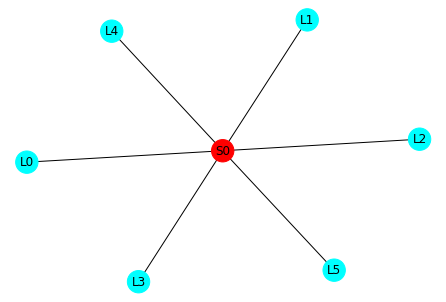

In [152]:
nviz.plot_soma_limb_concept_network(neuron_objs[1])

# Testing that the neuroglancer links match the mesh edits

In [198]:
du.plot_proofread_neuron(864691135373698121,
                        plot_errored_faces=True,
                        plot_error_synapses=True,
                        plot_proofreading_synapses=True)

Synapsse Results:
Total Number of Synapses = 137
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 24
n_valid_syn_ids_postsyn = 113
n_errored_syn_ids_postsyn = 0


In [186]:
ret_df = alu.stats_table_to_auto_proof_red_blue_suggestions_df(
    minnie.AutoProofreadStats4() & "segment_id=864691135373698121",
output_filepath="./864691135373698121_test.csv")
ret_df

# of Entries Processing = 1
Workin on 864691135373698121, split 0
error_type = axon_on_dendrite_merges
error_type = high_degree_branching
error_type = axon_webbing_t_merges
error_type = thick_t_merge
error_type = double_back_and_width_change
error_type = axon_fork_divergence


,segment_id,split_index,nucleus_id,spine_category,cell_type_predicted,error_type,limb_name,error_idx,neuroglancer_link,error_skeletal_length
0,864691135373698121,0,699408,densely_spined,excitatory,high_degree_branching,L5,0,https://neuromancer-seung-import.appspot.com/#...,6831.471640
1,864691135373698121,0,699408,densely_spined,excitatory,high_degree_branching,L5,1,https://neuromancer-seung-import.appspot.com/#...,2752.646988


# Debugging a Proofreading Neurons

In [192]:
segment_id = 864691135373698121
neuron_objs,neuron_split_idxs = du.decomposition_with_spine_recalculation(segment_id)

**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1


In [197]:
(minnie.AutoProofreadStats4() & "segment_id=864691135373698121").fetch("limb_branch_to_cancel")

array([{'axon_on_dendrite_merges_limb_branch_dict_to_cancel': {}, 'high_degree_branching_limb_branch_dict_to_cancel': {'L5': array([15, 17])}, 'axon_webbing_t_merges_limb_branch_dict_to_cancel': {}, 'thick_t_merge_limb_branch_dict_to_cancel': {}, 'double_back_and_width_change_limb_branch_dict_to_cancel': {}, 'axon_fork_divergence_limb_branch_dict_to_cancel': {}}],
      dtype=object)

In [200]:
nviz.plot_axon(output_dict["filtered_neuron"])


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [194]:
perform_axon_classification = False
high_fidelity_axon_on_excitatory = False
output_dict= pru.proofread_neuron(neuron_objs[0],
                            plot_limb_branch_filter_with_disconnect_effect=True,
                            plot_final_filtered_neuron=False,
                            perform_axon_classification = perform_axon_classification,
                            high_fidelity_axon_on_excitatory = high_fidelity_axon_on_excitatory,
                            verbose=True)

---- Part A: NOT Attempting to split neuron --------

--- Working on Neuron 0 ---


 ------ Part B: Axon Classification ---- 


Skipping Axon Classification
endnodes_to_test = [1428]
Skeleton paths distances = [24977.76243955]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [166.11274418]
local_axon_angles = [166.11274418]


 ------ Part C: Inhibitory Excitatory Classification ---- 


spine_category = densely_spined
Inhibitory Excitatory Classification = 8.110194683074951

 -- Cell Type Classification Results --
inh_exc_class=excitatory
spine_category=densely_spined
axon_angles={5: {0: 166.1127441808259}}
n_axons=1
n_apicals=1
neuron_spine_density=0.00042844720653172644
n_branches_processed=26
skeletal_length_processed=1745537.7363290659
n_branches_in_search_radius=61
skeletal_length_in_search_radius=2163078.0680514285


 ------ Part D: Neuron Filtering ---- 

 

*****Using v4 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = f

total_sk_distance = 175.51521933819393, total_area = 135.00800504510468
----------------------- FINISHED Running Filter ------------------



 --Filter high_degree_branching Results --

--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


----------------------- Running Filter ------------------
two_downstream_thin_axon_limb_branch = {}
wide_angled_children= {}
Final web t error limb branch dict = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict was empty so returning original neuron
----------------------- FINISHED Running Filter ------------------



 --Filter axon_webbing_t_merges Results --

--- Working on filter 3:
function = thick_t_merge
function __name__ = filter_away_thick_t_merge
function arguments = {}